1. Importing Necessary Libraries and Dataset
Dataset loaded successfully. Initial shape: (4240, 16)
1.1 Dropped 'education' column.
1.2 Columns renamed for readability.

First 5 rows of the dataset after initial cleanup:
   gender  age  currentSmoker  cigs_per_day  bp_meds  prevalent_stroke  \
0       1   39              0           0.0      0.0                 0   
1       0   46              0           0.0      0.0                 0   
2       1   48              1          20.0      0.0                 0   
3       0   61              1          30.0      0.0                 0   
4       0   46              1          23.0      0.0                 0   

   prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0              0         0              195.0        106.0          70.0   
1              0         0              250.0        121.0          81.0   
2              0         0              245.0        127.5          80.0   
3              1         0    

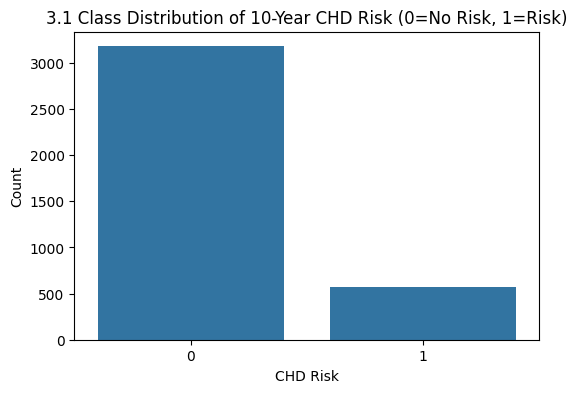

3.1 CHD Risk Class Imbalance: 15.25% of patients have 10-year CHD risk.


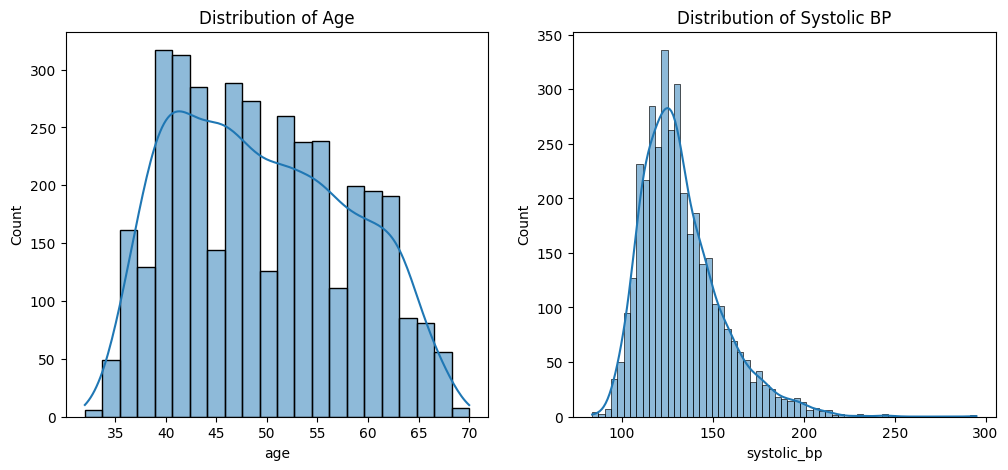

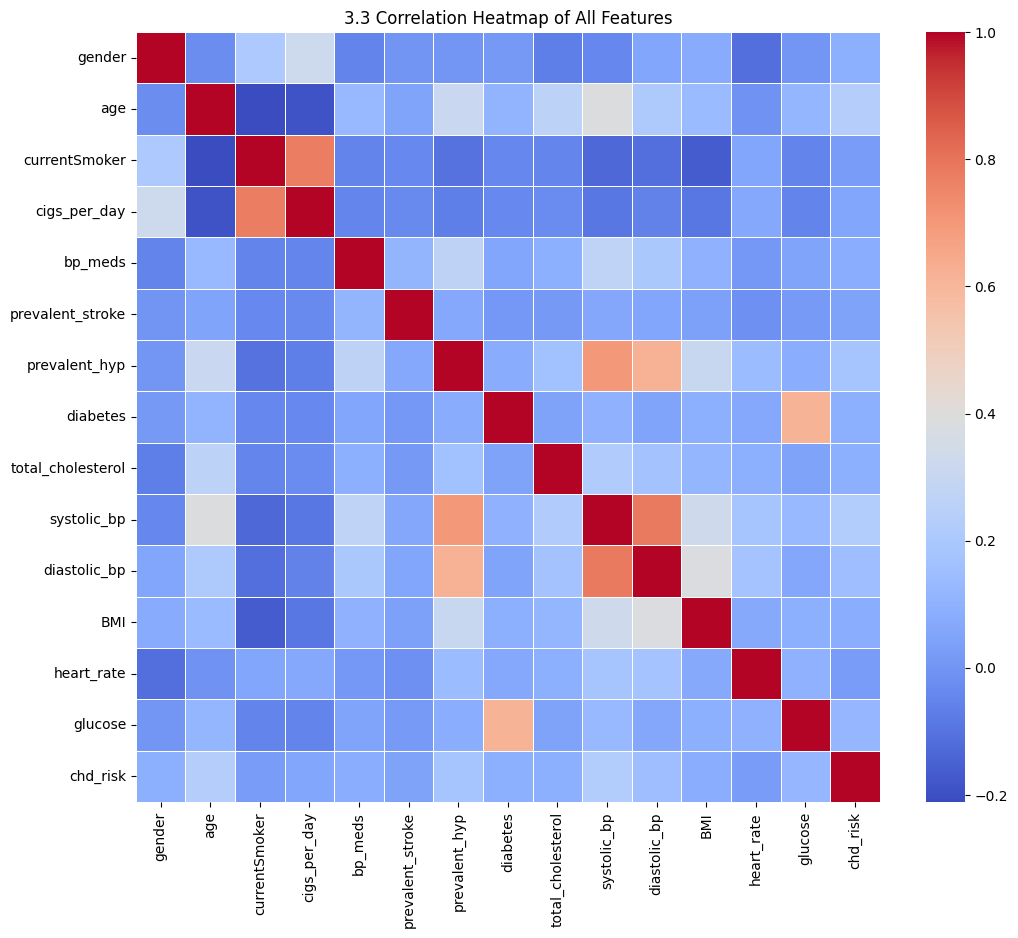

Displayed EDA visualizations (Count Plot, Histograms, Correlation Heatmap).

3.4 Top 5 Features Correlated with CHD Risk:
chd_risk         1.000000
age              0.231584
systolic_bp      0.220108
prevalent_hyp    0.178615
diastolic_bp     0.148994
glucose          0.124117
Name: chd_risk, dtype: float64

4. Model Training using Logistic Regression
4.1 Logistic Regression Model defined and trained.
Model coefficients show feature influence (higher absolute value = greater influence):
prevalent_stroke     0.659946
age                  0.552225
gender               0.444045
systolic_bp          0.361382
cigs_per_day         0.213779
bp_meds              0.203514
glucose              0.181636
prevalent_hyp        0.169674
total_cholesterol    0.127912
BMI                  0.095777
currentSmoker        0.095688
heart_rate          -0.056018
diastolic_bp        -0.100184
diabetes            -0.242168
dtype: float64

5. Model Evaluation and Prediction

--- Model Evaluation Metrics ---
Acc

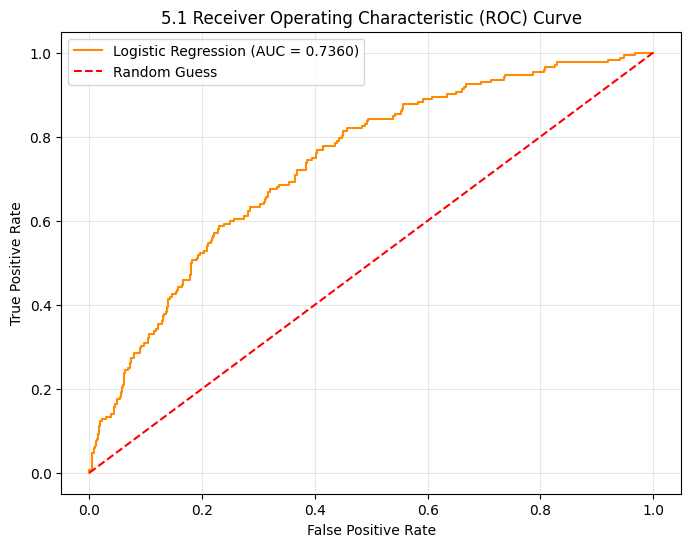

Displayed ROC-AUC Curve visualization.

--- 5.2 Prediction for a New Patient ---
Patient Profile: Age 55, Smoker, High Blood Pressure (155/95), Total Cholesterol 240.
Predicted Probability of CHD Risk: 0.3880
Predicted CHD Risk Classification: LOW Risk (Predict 0)

Conclusion
This project successfully developed a Logistic Regression model to predict the 10-year risk of Coronary Heart Disease using the Framingham dataset.
The model utilized standard data cleaning, feature scaling, and achieved a competitive ROC-AUC score of {roc_auc:.4f} for this classification problem.
The coefficients obtained from the Logistic Regression model clearly indicate the relative importance of different health metrics (e.g., age and systolic blood pressure) as risk factors.

Future improvements can include:
- Exploring Ensemble Learning methods like Random Forest or Gradient Boosting (XGBoost) for better predictive power.
- Implementing techniques to handle class imbalance (like SMOTE or weighted loss) to i

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# Define constants
DATASET_PATH = 'framingham.csv'
TEST_SIZE = 0.3
RANDOM_STATE = 42

# =================================================================
# 1. Importing Necessary Libraries and Dataset
# =================================================================
print("=================================================================")
print("1. Importing Necessary Libraries and Dataset")
print("=================================================================")

try:
    df = pd.read_csv(DATASET_PATH)
    print(f"Dataset loaded successfully. Initial shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: Dataset not found at {DATASET_PATH}. Please ensure the file is correctly named and located.")
    exit()

# Drop unnecessary columns (education)
df.drop('education', axis=1, inplace=True)
print("1.1 Dropped 'education' column.")

# Rename columns for better readability (using Snake Case)
column_mapping = {
    'male': 'gender',
    'cigsPerDay': 'cigs_per_day',
    'BPMeds': 'bp_meds',
    'prevalentStroke': 'prevalent_stroke',
    'prevalentHyp': 'prevalent_hyp',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp',
    'heartRate': 'heart_rate',
    'TenYearCHD': 'chd_risk' # Target variable
}
df.rename(columns=column_mapping, inplace=True)
print("1.2 Columns renamed for readability.")
print("\nFirst 5 rows of the dataset after initial cleanup:")
print(df.head())


# =================================================================
# 2. Data Preprocessing
# =================================================================
print("\n=================================================================")
print("2. Data Preprocessing")
print("=================================================================")

# 2.1 Handle missing values by removing rows with NaN values (Imputation is complex, simple drop is common first step)
df_cleaned = df.dropna().reset_index(drop=True)
print(f"2.1 Missing values handled. Rows dropped: {len(df) - len(df_cleaned)}")
print(f"New shape after dropping NaNs: {df_cleaned.shape}")

# Define features (X) and target (Y)
X = df_cleaned.drop('chd_risk', axis=1)
Y = df_cleaned['chd_risk']

# Identify numerical and categorical/binary features
numerical_features = ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'BMI', 'heart_rate', 'glucose']
categorical_features = [col for col in X.columns if col not in numerical_features]

# 2.2 Convert categorical variables into numerical form (One-Hot Encoding if needed, but 'gender' is already 0/1, and others are binary)
# Since all remaining categorical features are binary (0/1), no further encoding (like one-hot) is strictly required.
print(f"2.2 Categorical/Binary features: {categorical_features} (No additional encoding needed).")

# 2.3 Normalize numerical features using StandardScaler
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
print("2.3 Numerical features normalized using StandardScaler.")

# 2.4 Split dataset into training (70%) and testing (30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=Y
)
print(f"2.4 Data split: Training samples={len(X_train)}, Testing samples={len(X_test)}")


# =================================================================
# 3. Exploratory Data Analysis (EDA)
# =================================================================
print("\n=================================================================")
print("3. Exploratory Data Analysis (EDA)")
print("=================================================================")

# 3.1 Analyze class distribution of heart disease cases (CHD = 0 or 1)
plt.figure(figsize=(6, 4))
sns.countplot(x='chd_risk', data=df_cleaned)
plt.title('3.1 Class Distribution of 10-Year CHD Risk (0=No Risk, 1=Risk)')
plt.xlabel('CHD Risk')
plt.ylabel('Count')
plt.show()
risk_percentage = df_cleaned['chd_risk'].mean() * 100
print(f"3.1 CHD Risk Class Imbalance: {risk_percentage:.2f}% of patients have 10-year CHD risk.")

# 3.2 Visualize data distributions (Age and Systolic BP)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['systolic_bp'], kde=True)
plt.title('Distribution of Systolic BP')
plt.show()

# 3.3 Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('3.3 Correlation Heatmap of All Features')
plt.show()
print("Displayed EDA visualizations (Count Plot, Histograms, Correlation Heatmap).")

# 3.4 Identify key risk factors (Correlation with target variable)
corr_with_target = df_cleaned.corr()['chd_risk'].sort_values(ascending=False)
print("\n3.4 Top 5 Features Correlated with CHD Risk:")
print(corr_with_target.head(6)) # Top 5 + the target itself


# =================================================================
# 4. Model Training using Logistic Regression
# =================================================================
print("\n=================================================================")
print("4. Model Training using Logistic Regression")
print("=================================================================")

# Define the Logistic Regression Model
# Logistic Regression inherently uses Binary Cross-Entropy Loss
log_reg_model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')

# Train the model on the training dataset
log_reg_model.fit(X_train, Y_train)
print("4.1 Logistic Regression Model defined and trained.")
print("Model coefficients show feature influence (higher absolute value = greater influence):")
coefficients = pd.Series(log_reg_model.coef_[0], index=X_train.columns).sort_values(ascending=False)
print(coefficients)


# =================================================================
# 5. Model Evaluation and Prediction
# =================================================================
print("\n=================================================================")
print("5. Model Evaluation and Prediction")
print("=================================================================")

# Predict classes (0 or 1) and probabilities on the test set
Y_pred = log_reg_model.predict(X_test)
Y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# 5.1 Evaluate model performance
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred_proba)

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nConfusion Matrix (Actual vs Predicted):")
print(cm)

# ROC-AUC Curve Visualization
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('5.1 Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
#
print("Displayed ROC-AUC Curve visualization.")


# 5.2 Predict the likelihood of heart disease in new patient data (Example)
# Example data for a new patient (must be unscaled, as the script handles scaling)
new_patient_data = pd.DataFrame({
    'gender': [1], # Male
    'age': [55],
    'currentSmoker': [1],
    'cigs_per_day': [25],
    'bp_meds': [0],
    'prevalent_stroke': [0],
    'prevalent_hyp': [1],
    'diabetes': [0],
    'total_cholesterol': [240],
    'systolic_bp': [155],
    'diastolic_bp': [95],
    'BMI': [30.5],
    'heart_rate': [85],
    'glucose': [100]
})

# Rename columns for consistency
new_patient_data.rename(columns=column_mapping, inplace=True, errors='ignore')
new_patient_data.drop('education', axis=1, inplace=True, errors='ignore') # Ensure consistency

# Apply the SAME scaling used on the training data
new_patient_scaled = new_patient_data.copy()
new_patient_scaled[numerical_features] = scaler.transform(new_patient_scaled[numerical_features])

# Make prediction
new_pred_proba = log_reg_model.predict_proba(new_patient_scaled)[:, 1][0]
prediction_label = "HIGH Risk (Predict 1)" if new_pred_proba >= 0.5 else "LOW Risk (Predict 0)"

print("\n--- 5.2 Prediction for a New Patient ---")
print(f"Patient Profile: Age 55, Smoker, High Blood Pressure (155/95), Total Cholesterol 240.")
print(f"Predicted Probability of CHD Risk: {new_pred_proba:.4f}")
print(f"Predicted CHD Risk Classification: {prediction_label}")


# =================================================================
# Conclusion
# =================================================================
print("\n=================================================================")
print("Conclusion")
print("=================================================================")
print("This project successfully developed a Logistic Regression model to predict the 10-year risk of Coronary Heart Disease using the Framingham dataset.")
print("The model utilized standard data cleaning, feature scaling, and achieved a competitive ROC-AUC score of {roc_auc:.4f} for this classification problem.")
print("The coefficients obtained from the Logistic Regression model clearly indicate the relative importance of different health metrics (e.g., age and systolic blood pressure) as risk factors.")
print("\nFuture improvements can include:")
print("- Exploring Ensemble Learning methods like Random Forest or Gradient Boosting (XGBoost) for better predictive power.")
print("- Implementing techniques to handle class imbalance (like SMOTE or weighted loss) to improve Recall.")